In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import os
import re
import tensorflow as tf
from PIL import Image
flags = tf.app.flags
FLAGS = flags.FLAGS

import scipy.misc
from six.moves import xrange  # pylint: disable=redefined-builtin

import matplotlib.pyplot as plt
from matplotlib.image import imread

import argparse
import sys
import numpy as np
import pandas as pd
import tensorflow.contrib.rnn as rnn
import tensorflow.contrib.layers as layers
# from text_loader import TextLoader

from tensorflow.contrib.layers import batch_norm

from sklearn import metrics
print(tf.__version__)

1.9.0


In [2]:
data=pd.read_csv('celeba-dataset/attr.csv')

In [3]:
total=202599*25
total

5064975

In [14]:
data

,image_id,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,000001.jpg,0.230243,0.226421,0.228619,0.230902,0.229227,0.230029,0.228527,0.227724,0.227509,...,0.228122,0.847598,0.231347,0.226592,0.231567,0.227144,0.818762,0.226646,0.797713,0.964245
1,000002.jpg,0.854284,0.226421,0.228619,0.230902,0.229227,0.230029,0.228527,0.227724,0.227509,...,0.228122,0.326709,0.231347,0.226592,0.231567,0.227144,0.813673,0.226646,0.296929,0.963263
2,000003.jpg,0.230243,0.226421,0.228619,0.230902,0.229227,0.230029,0.228527,0.227724,0.227509,...,0.893831,0.857029,0.231347,0.226592,0.827042,0.227144,0.236010,0.226646,0.797451,0.495064
3,000004.jpg,0.230243,0.226421,0.228619,0.230902,0.229227,0.230029,0.228527,0.227724,0.227509,...,0.228122,0.848516,0.231347,0.226592,0.828885,0.227144,0.236010,0.226646,0.290901,0.962808
4,000005.jpg,0.230243,0.226421,0.228619,0.230902,0.229227,0.230029,0.228527,0.227724,0.227509,...,0.228122,0.326709,0.231347,0.226592,0.231567,0.227144,0.236010,0.226646,0.792245,0.965147
5,000006.jpg,0.230243,0.226421,0.228619,0.230902,0.229227,0.880379,0.228527,0.227724,0.227509,...,0.228122,0.844832,0.231347,0.226592,0.231567,0.227144,0.236010,0.226646,0.789205,0.964984
6,000007.jpg,0.843310,0.226421,0.228619,0.856332,0.229227,0.230029,0.876754,0.227724,0.227509,...,0.228122,0.838772,0.231347,0.226592,0.231567,0.227144,0.236010,0.226646,0.290901,0.495064
7,000008.jpg,0.853705,0.226421,0.228619,0.851993,0.229227,0.230029,0.228527,0.227724,0.227509,...,0.228122,0.326709,0.231347,0.226592,0.827412,0.227144,0.236010,0.226646,0.796232,0.495064
8,000009.jpg,0.230243,0.226421,0.793946,0.230902,0.229227,0.230029,0.228527,0.227724,0.227509,...,0.228122,0.326709,0.231347,0.226592,0.231567,0.227144,0.236010,0.226646,0.794794,0.964834
9,000010.jpg,0.230243,0.226421,0.228619,0.230902,0.229227,0.230029,0.228527,0.227724,0.227509,...,0.228122,0.845152,0.231347,0.226592,0.231567,0.227144,0.236010,0.226646,0.797354,0.963577


In [5]:
ds = tf.contrib.distributions
layers = tf.contrib.layers
tfgan = tf.contrib.gan
##리턴값 파악필요
##아직 conditional 고려안함 가져온 함수만 copnditional 버전
def _generator_helper(noise, is_conditional, one_hot_labels, weight_decay, is_training):
    
    with tf.contrib.framework.arg_scope(
        [layers.fully_connected, layers.conv2d_transpose],
        activation_fn=tf.nn.relu, normalizer_fn=layers.batch_norm,
        weights_regularizer=layers.l2_regularizer(weight_decay)):
        with tf.contrib.framework.arg_scope([layers.batch_norm], is_training=is_training):
            net = layers.fully_connected(noise, 1024)
            print(net)
            if is_conditional:
                net = tfgan.features.condition_tensor_from_onehot(net, one_hot_labels)
            net = layers.fully_connected(net, 4 * 4 * 512)
            print(net)
            net = tf.reshape(net, [-1, 4, 4, 512])
#             print(net)
#             res1 = layers.conv2d_transpose(net, 256, [4, 4], stride=2)
#             print(res1)
#             res2 = layers.conv2d_transpose(res1+net, 128, [4, 4], stride=2)
#             print(res2)
#             res3 = layers.conv2d_transpose(res2+res1, 64, [4, 4], stride=2)
#             print(res3)
#             net = layers.conv2d_transpose(res3+res2, 32, [4, 4], stride=2)
            print(net)
            net = layers.conv2d_transpose(net, 256, [4, 4], stride=2)
            print(net)
            net = layers.conv2d_transpose(net, 128, [4, 4], stride=2)
            print(net)
            net = layers.conv2d_transpose(net, 64, [4, 4], stride=2)
            print(net)
            net = layers.conv2d_transpose(net, 32, [4, 4], stride=2)
            print(net)
            # Make sure that generator output is in the same range as `inputs`
            # ie [-1, 1].
            net = layers.conv2d(net, 3, [4, 4], normalizer_fn=None, activation_fn=tf.tanh)
            print(net)
        return net
    
def unconditional_generator(noise, weight_decay=2.5e-5, is_training=True):

    return _generator_helper(noise, False, None, weight_decay, is_training)

def conditional_generator(inputs, weight_decay=2.5e-5, is_training=True):
    
    noise, one_hot_labels = inputs
    return _generator_helper(noise, True, one_hot_labels, weight_decay, is_training)

def _discriminator_helper(img, is_conditional, one_hot_labels, weight_decay):
#     tf.nn.leaky_relu(tf.layers.batch_normalization(deconv1, training=isTrain), 0.2)
    with tf.contrib.framework.arg_scope(
        [layers.conv2d, layers.fully_connected],
        activation_fn=tf.nn.leaky_relu, normalizer_fn=None,
        weights_regularizer=layers.l2_regularizer(weight_decay),
        biases_regularizer=layers.l2_regularizer(weight_decay)):
        print('@@@')
        print(img)
        net = layers.fully_connected(img, 32)
#         print(net)
#         res1 = layers.conv2d(net, 64, [4, 4], stride=2)
#         print(res1)
#         res2 = layers.conv2d(res1+net, 128, [4, 4], stride=2)
#         print(res2)
#         res3 = layers.conv2d(res2+res1, 256, [4, 4], stride=2)
#         print(res3)
#         net = layers.conv2d(res3+res2, 512, [4, 4], stride=2)
        print(net)
        net = layers.conv2d(net, 64, [4, 4], stride=2)
        print(net)
        net = layers.conv2d(net, 128, [4, 4], stride=2)
        print(net)
        net = layers.conv2d(net, 256, [4, 4], stride=2)
        print(net)
        net = layers.conv2d(net, 512, [4, 4], stride=2)
        print(net)
        net = layers.flatten(net)
        print(net)
        if is_conditional:
            net = tfgan.features.condition_tensor_from_onehot(net, one_hot_labels)
        net = layers.fully_connected(net, 1024, normalizer_fn=layers.layer_norm)
        print(net)

        return net
    
def unconditional_discriminator(img, unused_conditioning, weight_decay=2.5e-5):

    net = _discriminator_helper(img, False, None, weight_decay)
    return layers.linear(net, 1)

def conditional_discriminator(img, conditioning, weight_decay=2.5e-5):
    
    _, one_hot_labels = conditioning
    net = _discriminator_helper(img, True, one_hot_labels, weight_decay)
    return layers.linear(net, 1)

In [6]:
# ds = tf.contrib.distributions
# layers = tf.contrib.layers
# tfgan = tf.contrib.gan
# ##리턴값 파악필요
# ##아직 conditional 고려안함 가져온 함수만 copnditional 버전
# def _generator_helper(noise, is_conditional, one_hot_labels, weight_decay, is_training):
    
#     with tf.contrib.framework.arg_scope(
#         [layers.fully_connected, layers.conv2d_transpose],
#         activation_fn=tf.nn.relu, normalizer_fn=layers.batch_norm,
#         weights_regularizer=layers.l2_regularizer(weight_decay)):
#         with tf.contrib.framework.arg_scope([layers.batch_norm], is_training=is_training):
#             net = layers.fully_connected(noise, 1024)
#             print(net)
#             if is_conditional:
#                 net = tfgan.features.condition_tensor_from_onehot(net, one_hot_labels)
#             net = layers.fully_connected(net, 16 * 16 * 256)
#             print(net)
#             net = tf.reshape(net, [-1, 16, 16, 256])
#             print(net)
#             net = layers.conv2d_transpose(net, 64, [4, 4], stride=2)
#             print(net)
#             net = layers.conv2d_transpose(net, 16, [4, 4], stride=2)
#             print(net)
#             # Make sure that generator output is in the same range as `inputs`
#             # ie [-1, 1].
#             net = layers.conv2d(net, 3, [4, 4], normalizer_fn=None, activation_fn=tf.tanh)
#             print(net)
#         return net
    
# def unconditional_generator(noise, weight_decay=2.5e-5, is_training=True):

#     return _generator_helper(noise, False, None, weight_decay, is_training)

# def conditional_generator(inputs, weight_decay=2.5e-5, is_training=True):
    
#     noise, one_hot_labels = inputs
#     return _generator_helper(noise, True, one_hot_labels, weight_decay, is_training)

# def _discriminator_helper(img, is_conditional, one_hot_labels, weight_decay):
# #     tf.nn.leaky_relu(tf.layers.batch_normalization(deconv1, training=isTrain), 0.2)
#     with tf.contrib.framework.arg_scope(
#         [layers.conv2d, layers.fully_connected],
#         activation_fn=tf.nn.leaky_relu, normalizer_fn=None,
#         weights_regularizer=layers.l2_regularizer(weight_decay),
#         biases_regularizer=layers.l2_regularizer(weight_decay)):
#         print('@@@')
#         print(img)
#         net = layers.conv2d(img, 64, [4, 4], stride=2)
#         print(net)
#         net = layers.conv2d(net, 256, [4, 4], stride=2)
#         print(net)
#         net = layers.flatten(net)
#         print(net)
#         if is_conditional:
#             net = tfgan.features.condition_tensor_from_onehot(net, one_hot_labels)
#         net = layers.fully_connected(net, 1024, normalizer_fn=layers.layer_norm)
#         print(net)

#         return net
    
# def unconditional_discriminator(img, unused_conditioning, weight_decay=2.5e-5):

#     net = _discriminator_helper(img, False, None, weight_decay)
#     return layers.linear(net, 1)

# def conditional_discriminator(img, conditioning, weight_decay=2.5e-5):
    
#     _, one_hot_labels = conditioning
#     net = _discriminator_helper(img, True, one_hot_labels, weight_decay)
#     return layers.linear(net, 1)

In [7]:
def get_input_queue(csv_file_name,num_epochs = None):
    train_images = []
    train_labels = []
    for line in open(csv_file_name,'r'):
        cols = re.split(',|\n',line)
        train_images.append('celeba-dataset/img_align_celeba/'+cols[0])
        # 3rd column is label and needs to be converted to int type
        train_labels.append(float(cols[2]))
    input_queue = tf.train.slice_input_producer([train_images,train_labels],num_epochs = num_epochs,shuffle = True)

    return input_queue


In [8]:
def read_data(input_queue):
    image_file = input_queue[0]
    label = input_queue[1]
    image =  tf.image.decode_jpeg(tf.read_file(image_file),channels=3)

    return image,label,image_file


In [9]:
def read_data_batch(csv_file_name,batch_size):
    input_queue = get_input_queue(csv_file_name)
    image,label,file_name= read_data(input_queue)
    image = tf.image.resize_images(image,[64,64])
    image = tf.reshape(image,[64,64,3])

    # random image
    image = tf.image.random_flip_left_right(image)
#     image = tf.image.random_brightness(image,max_delta=0.5)
#     image = tf.image.random_contrast(image,lower=0.2,upper=2.0)
#     image = tf.image.random_hue(image,max_delta=0.08)
#     image = tf.image.random_saturation(image,lower=0.2,upper=2.0)

    batch_image,batch_label,batch_file = tf.train.batch([image,label,file_name],batch_size=batch_size)
    print(batch_image)
    print(batch_label)
    print(batch_file)
    #,enqueue_many=True)
    batch_file = tf.reshape(batch_file,[batch_size,1],name='img')

    return tf.cast(batch_image,tf.float32),batch_file


In [10]:
image_batch,label_batch = read_data_batch('celeba-dataset/attr.csv',64) 


Tensor("batch:0", shape=(64, 64, 64, 3), dtype=float32)
Tensor("batch:1", shape=(64,), dtype=float32)
Tensor("batch:2", shape=(64,), dtype=string)


In [11]:
tfgan = tf.contrib.gan

def _get_train_input_fn(batch_size, noise_dims, dataset_dir=None,num_threads=4):
    def train_input_fn():
        with tf.device('/cpu:0'):
            ##데이터제작 http://bcho.tistory.com/1178 참고
            images,labels = read_data_batch('celeba-dataset/attr.csv',32) 
        noise = tf.random_normal([batch_size, noise_dims])
        return noise, images
    return train_input_fn


def _get_predict_input_fn(batch_size, noise_dims):
    def predict_input_fn():
        noise = tf.random_normal([batch_size, noise_dims])
        return noise
    return predict_input_fn

In [40]:
gan_estimator = tf.contrib.gan.estimator.GANEstimator(
    generator_fn=unconditional_generator,
    discriminator_fn=unconditional_discriminator,
    ##loss함수를 직접 만들어서 함수자체를 넘겨줘야할 수 있음
    generator_loss_fn=tf.contrib.gan.losses.wasserstein_generator_loss,
    discriminator_loss_fn=tf.contrib.gan.losses.wasserstein_discriminator_loss,
    generator_optimizer=tf.train.AdamOptimizer(0.01, 0.5),
    discriminator_optimizer=tf.train.AdamOptimizer(0.01, 0.5),
    add_summaries=tfgan.estimator.SummaryType.IMAGES)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_service': None, '_log_step_count_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fb4e0b39898>, '_device_fn': None, '_tf_random_seed': None, '_session_config': None, '_model_dir': '/tmp/tmp0t4wyrxx', '_keep_checkpoint_max': 5, '_num_worker_replicas': 1, '_save_checkpoints_steps': None, '_num_ps_replicas': 0, '_task_id': 0, '_task_type': 'worker', '_global_id_in_cluster': 0, '_train_distribute': None, '_master': '', '_is_chief': True, '_evaluation_master': '', '_save_summary_steps': 100}


In [41]:
# tensors_to_log = {'img':'img'}
tensors_to_log = {}
logging_hook = tf.train.LoggingTensorHook(tensors=tensors_to_log, every_n_iter=100)

##리턴값 파악필요
train_input_fn = _get_train_input_fn(32, 256)
gan_estimator.train(train_input_fn, max_steps=500, hooks=[logging_hook])


#   # Nicely tile.
# image_rows = [np.concatenate(predictions[i:i+6], axis=0) for i in range(0, 36, 6)]
# tiled_image = np.concatenate(image_rows, axis=1)


Tensor("batch:0", shape=(32, 64, 64, 3), dtype=float32, device=/device:CPU:0)
Tensor("batch:1", shape=(32,), dtype=float32, device=/device:CPU:0)
Tensor("batch:2", shape=(32,), dtype=string, device=/device:CPU:0)
INFO:tensorflow:Calling model_fn.
Tensor("Generator/fully_connected/Relu:0", shape=(32, 1024), dtype=float32)
Tensor("Generator/fully_connected_1/Relu:0", shape=(32, 8192), dtype=float32)
Tensor("Generator/Reshape:0", shape=(32, 4, 4, 512), dtype=float32)
Tensor("Generator/Conv2d_transpose/Relu:0", shape=(32, 8, 8, 256), dtype=float32)
Tensor("Generator/Conv2d_transpose_1/Relu:0", shape=(32, 16, 16, 128), dtype=float32)
Tensor("Generator/Conv2d_transpose_2/Relu:0", shape=(32, 32, 32, 64), dtype=float32)
Tensor("Generator/Conv2d_transpose_3/Relu:0", shape=(32, 64, 64, 32), dtype=float32)
Tensor("Generator/Conv/Tanh:0", shape=(32, 64, 64, 3), dtype=float32)
@@@
Tensor("Generator/Conv/Tanh:0", shape=(32, 64, 64, 3), dtype=float32)
Tensor("Discriminator/fully_connected/LeakyRelu:0

In [42]:
# # Run inference.
predict_input_fn = _get_predict_input_fn(1, 256)
predictions = gan_estimator.predict(predict_input_fn)
# predictions = [prediction_iterable.next() for _ in xrange(36)]
# y_predicted = np.array(list(predictions))
predictions
n=0
for x in predictions:
    print(type(predictions))
    print(predictions)
    print(type(x))
    print(x.shape)
#     print(x)
    predictions=x
    if(n==0):
        break
    n=n+1
    
# print(predictions)

# y_predicted = np.array(list(predictions for _ in xrange(36)))
# print(y_predicted)
# print(y_predicted.shape)

INFO:tensorflow:Calling model_fn.
Tensor("Generator/fully_connected/Relu:0", shape=(1, 1024), dtype=float32)
Tensor("Generator/fully_connected_1/Relu:0", shape=(1, 8192), dtype=float32)
Tensor("Generator/Reshape:0", shape=(1, 4, 4, 512), dtype=float32)
Tensor("Generator/Conv2d_transpose/Relu:0", shape=(1, 8, 8, 256), dtype=float32)
Tensor("Generator/Conv2d_transpose_1/Relu:0", shape=(1, 16, 16, 128), dtype=float32)
Tensor("Generator/Conv2d_transpose_2/Relu:0", shape=(1, 32, 32, 64), dtype=float32)
Tensor("Generator/Conv2d_transpose_3/Relu:0", shape=(1, 64, 64, 32), dtype=float32)
Tensor("Generator/Conv/Tanh:0", shape=(1, 64, 64, 3), dtype=float32)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp0t4wyrxx/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'generator'>
<generator object Estimator.predict at 0x7fb4d85f3ba0>
<class 'numpy.ndarray'>
(64, 64, 3)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """Entry point for launching an IPython kernel.


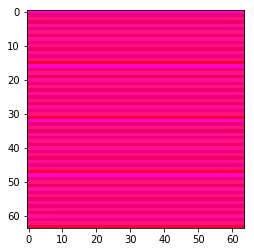

In [43]:
scipy.misc.imsave('outfile.jpg', predictions)
outimg = imread('outfile.jpg')
plt.imshow(outimg)

In [ ]:
# def generator_fn(x, y_label,):
#     w_init = tf.truncated_normal_initializer(mean=0.0, stddev=0.02)
#     b_init = tf.constant_initializer(0.0)

#     # concat layer
#     cat1 = tf.concat([x, y_label], 3)

#     # 1st hidden layer
#     deconv1 = tf.layers.conv2d_transpose(cat1, 256, [7, 7], strides=(1, 1), padding='valid', kernel_initializer=w_init, bias_initializer=b_init)
#     lrelu1 = tf.nn.leaky_relu(tf.layers.batch_normalization(deconv1, training=isTrain), 0.2)

#     # 2nd hidden layer
#     deconv2 = tf.layers.conv2d_transpose(lrelu1, 128, [5, 5], strides=(2, 2), padding='same', kernel_initializer=w_init, bias_initializer=b_init)
#     lrelu2 = tf.nn.leaky_relu(tf.layers.batch_normalization(deconv2, training=isTrain), 0.2)

#     # output layer
#     deconv3 = tf.layers.conv2d_transpose(lrelu2, 1, [5, 5], strides=(2, 2), padding='same', kernel_initializer=w_init, bias_initializer=b_init)
#     o = tf.nn.tanh(deconv3)

#     return o

In [ ]:
# def discriminator_fn(x, y_fill):
#     w_init = tf.truncated_normal_initializer(mean=0.0, stddev=0.02)
#     b_init = tf.constant_initializer(0.0)

#     # concat layer
#     cat1 = tf.concat([x, y_fill], 3)

#     # 1st hidden layer
#     conv1 = tf.layers.conv2d(cat1, 128, [5, 5], strides=(2, 2), padding='same', kernel_initializer=w_init, bias_initializer=b_init)
#     lrelu1 = tf.nn.leaky_relu(conv1, 0.2)

#     # 2nd hidden layer
#     conv2 = tf.layers.conv2d(lrelu1, 256, [5, 5], strides=(2, 2), padding='same', kernel_initializer=w_init, bias_initializer=b_init)
#     lrelu2 = tf.nn.leaky_relu(tf.layers.batch_normalization(conv2, training=isTrain), 0.2)

#     # output layer
#     conv3 = tf.layers.conv2d(lrelu2, 1, [7, 7], strides=(1, 1), padding='valid', kernel_initializer=w_init)
#     o = tf.nn.sigmoid(conv3)

#     return o, conv3

In [ ]:

# gan_estimator.evaluate(eval_input_fn)


In [ ]:
# predictions = np.array([x for x in predictions])